# Calculating and plotting Einstein solids

We'll follow the notation in the Schroeder text in sections 2.2 and 2.3.

The multiplicity for a single Einstein solid with $N$ oscillators and total energy $q$ (in units of $hf$) is:
$$
        \Omega(N,q) = {q+N-1\choose q} = \frac{(q+N-1)!}{q!(N-1)!}
$$



In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def ein_mult(N, q):
    """
    Calculate the Einstein solid multiplicity and return it as
     an integer.
    """
    return int(comb(q + N -1, q))  

## Schroeder section 2.2 Einstein model

### Problem 2.5
For an Einstein solid with each of the following values of $N$ and $q$, list all of the possible microstates, count them, and verify the multiplicity formula.

(a) $N=3$, $q=4$ <br>
(b) $N=3$, $q=5$ <br>
(c) $N=3$, $q=6$ <br>
(d) $N=4$, $q=2$ <br>
(e) $N=4$, $q=3$ <br>
(f) $N=1$, $q=\mbox{anything}$ <br>
(g) $N=\mbox{anything}$, $q=1$

In [3]:
ein_mult(10, 1)  # 2.5(a)

10

In [4]:
ein_mult(4, 3)  # 2.5(e)

20

In [5]:
ein_mult(1, 20)  # 2.5(f) --> try other q values

1

### Problem 2.6

Calculate the multiplicity of an Einstein solid with 30 oscillators and 30 units of energy.

In [6]:
print(f'answer = {ein_mult(30, 30):.2e}') # print 3 sig figs

answer = 5.91e+16


## Section 2.3 Interacting systems

Now we have two Einstein solids, $A$ and $B$, which have $N_A$ and $N_B$ oscillators, respectively. The individual multiplicities of each solid are:
$$
        \Omega_A(N_A,q_A) = {q_A+N_A-1\choose q_A} = \frac{(q_A+N_A-1)!}{q_A!(N_A-1)!}
$$

$$
        \Omega_B(N_B,q_B) = {q_B+N_B-1\choose B_A} = \frac{(q_B+N_B-1)!}{q_B!(N_B-1)!}
$$

while the total multiplicity with $q_{\rm total} = q_A + q_B$ is
  $ \Omega_{\rm total} = \Omega_A \times \Omega_B$.


In [7]:
def convert_int(my_int, large=10**7):
    """
    If my_int is larger than large, return an exponential form.
      The right justification for ints should be log10(large) + 1.
    """
    if my_int > large:
        return "{: .1e}".format(my_int)
    else:
        return "{:> 8}".format(my_int)

In [8]:
def macrostate_table(N_A, N_B, q_tot, table=True):
    """
    Step through q_A and q_B = q_tot - q_A and use ein_mult 
      to find Omega_A and Omega_B.
    Total multiplicity from: Omega_tot = Omega_A * Omega_B
   
    Construct a table like in Schroeder with macrostates 
      and multiplicities for a system of two Einstein solids
      and return an array of Omega_tot values.
      
    If table=False, don't print the table but return the array
     of Omega_tot values.
    """
    if table:
        print('  q_A     Omega_A     q_B      Omega_B   Omega_tot')
    tot_microstates = 0
    Omega_tot_array = np.zeros(q_tot+1)  # collect Omega_tot values
    for q_A in range(q_tot+1):
        Omega_A = ein_mult(N_A, q_A) 
        
        q_B = q_tot - q_A
        Omega_B = ein_mult(N_B, q_B) 

        Omega_tot = Omega_A * Omega_B
        Omega_tot_array[q_A] = Omega_tot
        tot_microstates += Omega_tot
        
        if table:
            print (f' {q_A:> 4}   {convert_int(Omega_A)}     {q_B:> 4}',
                   f'   {convert_int(Omega_B)}  ',
                   f'{convert_int(Omega_tot)}')
    print(f'Total microstates = {convert_int(tot_microstates)}')
    return Omega_tot_array

### Figure 2.4

In [9]:
Omega_tot_array = macrostate_table(3, 3, 6)

  q_A     Omega_A     q_B      Omega_B   Omega_tot
    0          1        6          28         28
    1          3        5          21         63
    2          6        4          15         90
    3         10        3          10        100
    4         15        2           6         90
    5         21        1           3         63
    6         28        0           1         28
Total microstates =      462


In [10]:
Omega_tot_array

array([ 28.,  63.,  90., 100.,  90.,  63.,  28.])

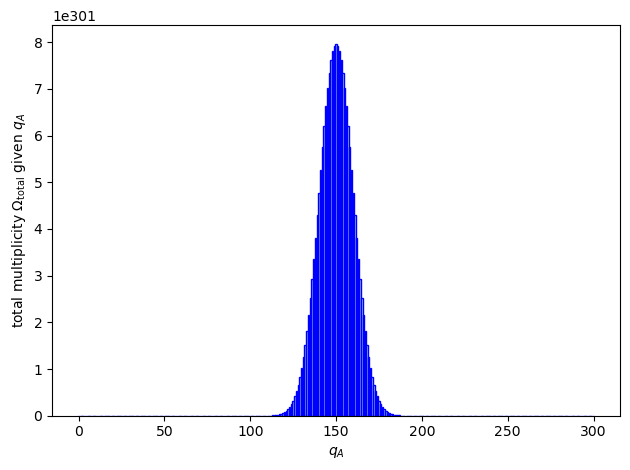

In [17]:
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(Omega_tot_array))
ax0.bar(q_array, Omega_tot_array, edgecolor='blue', color='lightblue')
ax0.set_xlabel(r'$q_A$')
ax0.set_ylabel(r'total multiplicity $\Omega_{\rm total}$ given $q_A$')
#ax0.set_xlim(q_array[0], q_array[-1])
fig.tight_layout()

### Figure 2.5

In [12]:
Omega_tot_array = macrostate_table(300, 200, 100)

  q_A     Omega_A     q_B      Omega_B   Omega_tot
    0          1      100     2.8e+81    2.8e+81
    1        300       99     9.3e+80    2.8e+83
    2      45150       98     3.1e+80    1.4e+85
    3    4545100       97     1.0e+80    4.6e+86
    4    3.4e+08       96     3.3e+79    1.1e+88
    5    2.1e+10       95     1.1e+79    2.3e+89
    6    1.1e+12       94     3.5e+78    3.7e+90
    7    4.7e+13       93     1.1e+78    5.2e+91
    8    1.8e+15       92     3.6e+77    6.4e+92
    9    6.1e+16       91     1.1e+77    6.9e+93
   10    1.9e+18       90     3.6e+76    6.7e+94
   11    5.3e+19       89     1.1e+76    5.9e+95
   12    1.4e+21       88     3.4e+75    4.7e+96
   13    3.3e+22       87     1.0e+75    3.5e+97
   14    7.4e+23       86     3.2e+74    2.4e+98
   15    1.5e+25       85     9.6e+73    1.5e+99
   16    3.0e+26       84     2.9e+73    8.8e+99
   17    5.7e+27       83     8.5e+72    4.8e+100
   18    1.0e+29       82     2.5e+72    2.5e+101
   19    1.7e+30

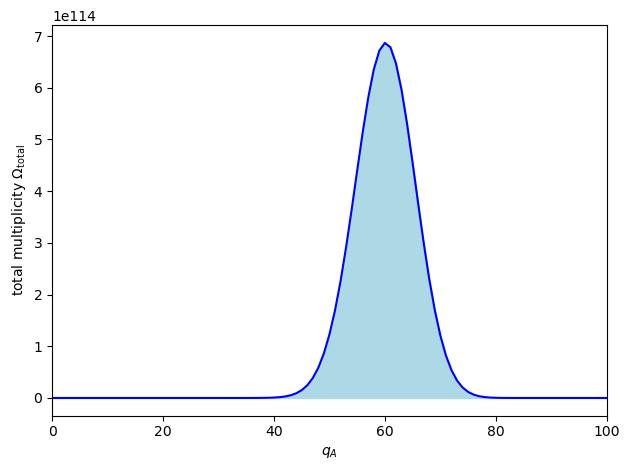

In [13]:
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(Omega_tot_array))
ax0.plot(q_array, Omega_tot_array, color='blue')
ax0.fill_between(q_array, Omega_tot_array, color='lightblue')
ax0.set_xlabel(r'$q_A$')
ax0.set_ylabel(r'total multiplicity $\Omega_{\rm total}$')
ax0.set_xlim(q_array[0], q_array[-1])
fig.tight_layout()

### Test the upper limit of system size

The largest float in Python is about $2.3\times 10^{308}$.

In [14]:
Omega_tot_array = macrostate_table(500, 500, 300, table=True)

  q_A     Omega_A     q_B      Omega_B   Omega_tot
    0          1      300     1.3e+228    1.3e+228
    1        500      299     4.8e+227    2.4e+230
    2     125250      298     1.8e+227    2.3e+232
    3    2.1e+07      297     6.8e+226    1.4e+234
    4    2.6e+09      296     2.5e+226    6.7e+235
    5    2.7e+11      295     9.4e+225    2.5e+237
    6    2.2e+13      294     3.5e+225    7.8e+238
    7    1.6e+15      293     1.3e+225    2.1e+240
    8    1.0e+17      292     4.8e+224    4.9e+241
    9    5.8e+18      291     1.8e+224    1.0e+243
   10    2.9e+20      290     6.5e+223    1.9e+244
   11    1.4e+22      289     2.4e+223    3.3e+245
   12    5.8e+23      288     8.8e+222    5.1e+246
   13    2.3e+25      287     3.2e+222    7.4e+247
   14    8.4e+26      286     1.2e+222    9.9e+248
   15    2.9e+28      285     4.3e+221    1.2e+250
   16    9.2e+29      284     1.6e+221    1.4e+251
   17    2.8e+31      283     5.7e+220    1.6e+252
   18    8.1e+32      282     2

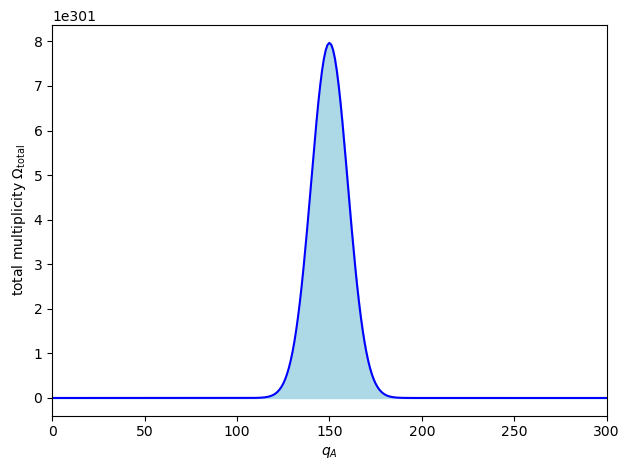

In [15]:
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(Omega_tot_array))
ax0.plot(q_array, Omega_tot_array, color='blue')
ax0.fill_between(q_array, Omega_tot_array, color='lightblue')
ax0.set_xlabel(r'$q_A$')
ax0.set_ylabel(r'total multiplicity $\Omega_{\rm total}$')
ax0.set_xlim(q_array[0], q_array[-1])
fig.tight_layout()

In [16]:
Omega_tot_array = macrostate_table(600, 500, 300, table=False)

OverflowError: int too large to convert to float